<a href="https://colab.research.google.com/github/Ayushsingh1007/DATA-ANALYSIS-PROJECTS/blob/main/Idea_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [4]:
data = pd.read_excel('/content/drive/MyDrive/iFood.xlsx')
print(data)

      Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      1001   58138        0         0       58       635         88   
1      1002   46344        1         1       38        11          1   
2      1003   71613        0         0       26       426         49   
3      1004   26646        1         0       26        11          4   
4      1005   58293        1         0       94       173         43   
...     ...     ...      ...       ...      ...       ...        ...   
2200   3201   61223        0         1       46       709         43   
2201   3202   64014        2         1       56       406          0   
2202   3203   56981        0         0       91       908         48   
2203   3204   69245        0         1        8       428         30   
2204   3205   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0                 546              172                88

**QUICKLY INSPECT THE DATA USE HEAD**

In [5]:
print(data.head)

<bound method NDFrame.head of       Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      1001   58138        0         0       58       635         88   
1      1002   46344        1         1       38        11          1   
2      1003   71613        0         0       26       426         49   
3      1004   26646        1         0       26        11          4   
4      1005   58293        1         0       94       173         43   
...     ...     ...      ...       ...      ...       ...        ...   
2200   3201   61223        0         1       46       709         43   
2201   3202   64014        2         1       56       406          0   
2202   3203   56981        0         0       91       908         48   
2203   3204   69245        0         1        8       428         30   
2204   3205   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0                 546     

**IDENTIFYING THE NULL VALUE IN DATA**

In [6]:
print(data.isnull())

      Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     False   False    False     False    False     False      False   
1     False   False    False     False    False     False      False   
2     False   False    False     False    False     False      False   
3     False   False    False     False    False     False      False   
4     False   False    False     False    False     False      False   
...     ...     ...      ...       ...      ...       ...        ...   
2200  False   False    False     False    False     False      False   
2201  False   False    False     False    False     False      False   
2202  False   False    False     False    False     False      False   
2203  False   False    False     False    False     False      False   
2204  False   False    False     False    False     False      False   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0               False            False             False

**MISSING DATA IDENTIFY**

In [7]:
print(data.isnull().sum())

Index                  0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntRegularProds        0
MntGoldProds           0
MntTotal               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmpOverall     0
Complain               0
Age                    0
Customer_Days          0
marital_status         0
education              0
dtype: int64


**INFORMATION ABOUT DATA**

In [8]:
print(data.info)

<bound method DataFrame.info of       Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      1001   58138        0         0       58       635         88   
1      1002   46344        1         1       38        11          1   
2      1003   71613        0         0       26       426         49   
3      1004   26646        1         0       26        11          4   
4      1005   58293        1         0       94       173         43   
...     ...     ...      ...       ...      ...       ...        ...   
2200   3201   61223        0         1       46       709         43   
2201   3202   64014        2         1       56       406          0   
2202   3203   56981        0         0       91       908         48   
2203   3204   69245        0         1        8       428         30   
2204   3205   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0                 546   

In [9]:
print(data.isnull().sum())

Index                  0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntRegularProds        0
MntGoldProds           0
MntTotal               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmpOverall     0
Complain               0
Age                    0
Customer_Days          0
marital_status         0
education              0
dtype: int64


**DESCRIBEING THE DATA**

In [10]:
print(data.describe())

             Index         Income      Kidhome     Teenhome      Recency  \
count  2205.000000    2205.000000  2205.000000  2205.000000  2205.000000   
mean   2103.000000   51622.094785     0.442177     0.506576    49.009070   
std     636.672993   20713.063826     0.537132     0.544380    28.932111   
min    1001.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1552.000000   35196.000000     0.000000     0.000000    24.000000   
50%    2103.000000   51287.000000     0.000000     0.000000    49.000000   
75%    2654.000000   68281.000000     1.000000     1.000000    74.000000   
max    3205.000000  113734.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2205.000000  2205.000000      2205.000000      2205.000000   
mean    306.164626    26.403175       165.312018        37.756463   
std     337.493839    39.784484       217.784507        54.824635   
min       0.000000     0.000000        

**AcceptedCmpOverall indicates how many total marketing campaigns a customer has accepted**

In [11]:
print(data.AcceptedCmpOverall)

0       0
1       0
2       0
3       0
4       0
       ..
2200    0
2201    1
2202    1
2203    0
2204    0
Name: AcceptedCmpOverall, Length: 2205, dtype: int64


In [12]:
print(data.AcceptedCmpOverall.value_counts())

AcceptedCmpOverall
0    1747
1     322
2      81
3      44
4      11
Name: count, dtype: int64


**ACCESS THE COLUMN**

In [13]:
print(data.columns)

Index(['Index', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntRegularProds', 'MntGoldProds', 'MntTotal', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall', 'Complain', 'Age',
       'Customer_Days', 'marital_status', 'education'],
      dtype='object')


**Assessing unique values**

In [14]:
print(data.nunique())

Index                  2205
Income                 1963
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                775
MntFruits               158
MntMeatProducts         551
MntFishProducts         182
MntSweetProducts        176
MntRegularProds         974
MntGoldProds            212
MntTotal                897
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      13
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp1              2
AcceptedCmp2              2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmpOverall        5
Complain                  2
Age                      56
Customer_Days           662
marital_status            5
education                 5
dtype: int64


**DUPLICATE DATA REMOVE**

In [15]:
print(data.drop_duplicates(inplace=True))

None


**DETECT OUTLIER**

Axes(0.125,0.11;0.775x0.77)


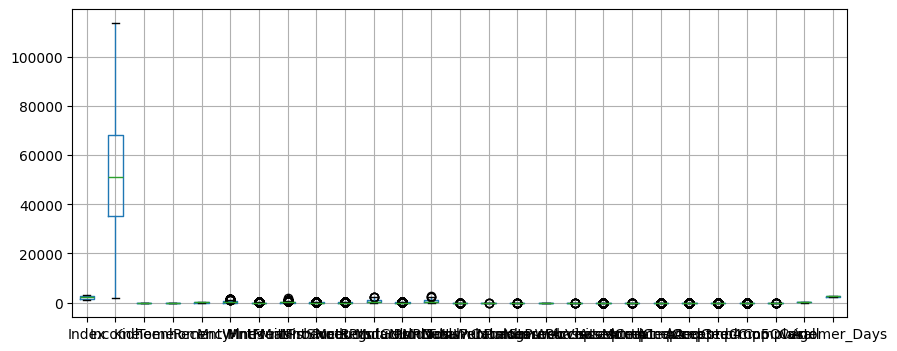

In [16]:
print(data.boxplot(figsize=(10,4)))

**Descriptive Statistics**

**Average Purchase Value**

In [17]:
print(data['MntTotal'].mean())

562.7646258503402


**MEAN OF NUMBER DEALS PURCHASES**

In [18]:
print(data['NumDealsPurchases'].mean)

<bound method Series.mean of 0       3
1       2
2       1
3       2
4       5
       ..
2200    2
2201    7
2202    1
2203    2
2204    3
Name: NumDealsPurchases, Length: 2205, dtype: int64>


**MAXMIUM MNT TOTAL**

In [19]:
print(data['MntTotal'].max())

2491


**MINIMUM MNT TOTAL**

In [20]:
print(data['MntTotal'].min())

4


**SUM OF MNT TOTAL**

In [21]:
print(data['MntTotal'].sum())

1240896


**Standard Deviation**

In [22]:
print(data['NumDealsPurchases'].std())

1.8861066836644749


**IDENTIFY NUMBER DEALS PURCHASES MODE**

In [23]:
print(data['NumDealsPurchases'].mode())

0    1
Name: NumDealsPurchases, dtype: int64


**IDENTIFY NUMBER DEALS PURCHASES MEDIAN**

In [24]:
print(data['NumDealsPurchases'].median())

2.0


**Whole Dataset Statistical Summary**

In [25]:
print(data.describe())

             Index         Income      Kidhome     Teenhome      Recency  \
count  2205.000000    2205.000000  2205.000000  2205.000000  2205.000000   
mean   2103.000000   51622.094785     0.442177     0.506576    49.009070   
std     636.672993   20713.063826     0.537132     0.544380    28.932111   
min    1001.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1552.000000   35196.000000     0.000000     0.000000    24.000000   
50%    2103.000000   51287.000000     0.000000     0.000000    49.000000   
75%    2654.000000   68281.000000     1.000000     1.000000    74.000000   
max    3205.000000  113734.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2205.000000  2205.000000      2205.000000      2205.000000   
mean    306.164626    26.403175       165.312018        37.756463   
std     337.493839    39.784484       217.784507        54.824635   
min       0.000000     0.000000        

**LOYAL CUSTOMER JOIN WITH US**

In [26]:
customer_spend = data.groupby('Index')['MntTotal'].sum()
print(customer_spend.head())

Index
1001    1529
1002      21
1003     734
1004      48
1005     407
Name: MntTotal, dtype: int64


**LONG TIME CUSTOMERS**

In [27]:
long_time_customers_educations = data.sort_values(by='Recency').head(8)
print(long_time_customers_educations)

      Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
22     1023   65324        0         1        0       384          0   
61     1062   32474        1         1        0        10          0   
330    1331   84835        0         0        0       189        104   
374    1375   62499        1         0        0       140          4   
1652   2653   49544        1         0        0       308          0   
1069   2070   71691        0         0        0       336        130   
846    1847   43456        0         1        0       275         11   
831    1832   65324        0         1        0       384          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
22                102               21                32  ...             0   
61                  1                0                 0  ...             0   
330               379              111               189  ...             0   
374                61              

**OLD CUSTOMER AS WELL AS CONSISTANT BUYER**

In [28]:
long_loyal_customers = data.sort_values(['Recency', 'MntTotal'], ascending=[True, False]).head(10)
print(long_loyal_customers)

      Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
2023   3024   81044        0         0        0       450         26   
729    1730   63564        0         0        0       769         80   
1069   2070   71691        0         0        0       336        130   
1512   2513   67786        0         0        0       431         82   
330    1331   84835        0         0        0       189        104   
2168   3169   57731        0         1        0       266         21   
1127   2128   54450        1         1        0       454          0   
1141   2142   54450        1         1        0       454          0   
802    1803   57091        0         0        0       464          5   
22     1023   65324        0         1        0       384          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
2023              535               73                98  ...             0   
729               252               15           

**DATA EXPLORATION**

**BOX PLOTING**

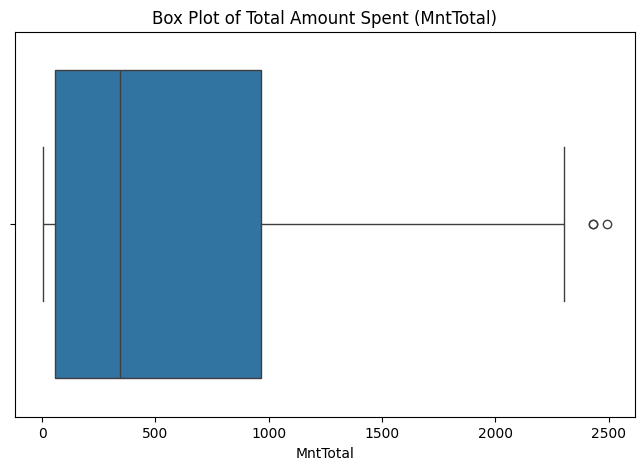

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['MntTotal'])
plt.title("Box Plot of Total Amount Spent (MntTotal)")
plt.show()


**OUTLIERS**

In [30]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = data[(data['MntTotal'] < lower_limit) | (data['MntTotal'] > upper_limit)]
print("Number of Outliers in MntTotal:", len(outliers))


Number of Outliers in MntTotal: 3


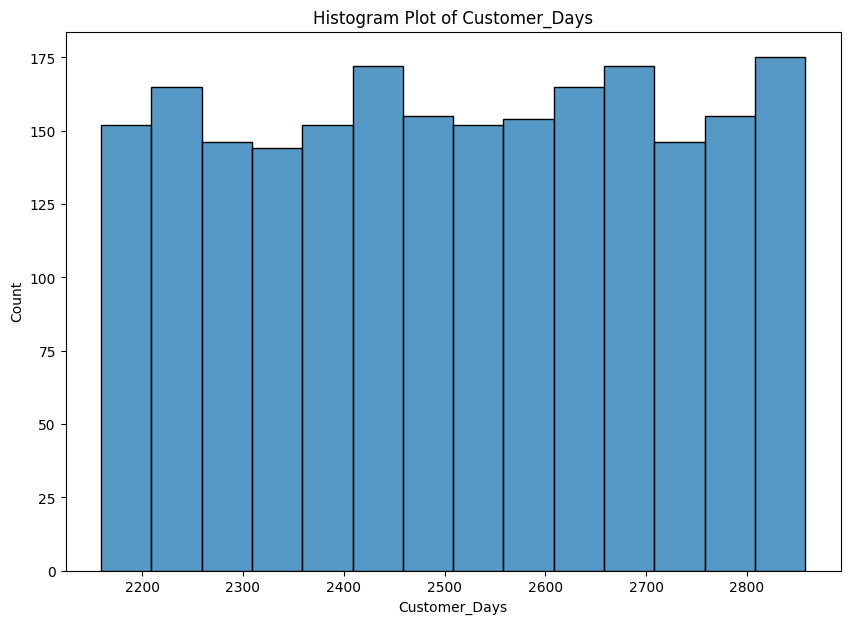

In [31]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Customer_Days'])
plt.title("Histogram Plot of Customer_Days")
plt.show()

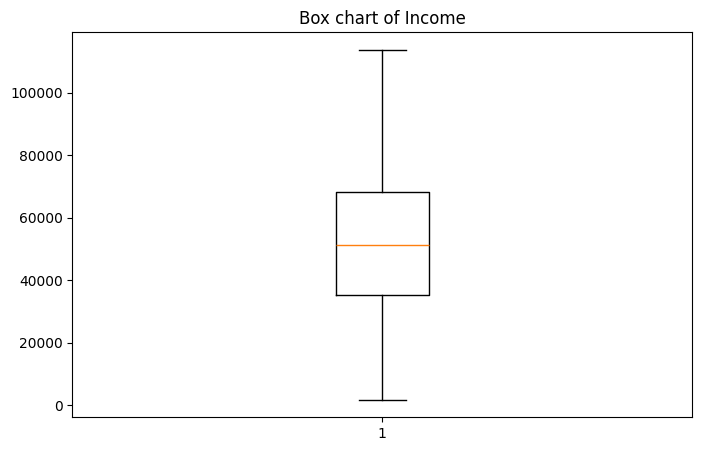

In [32]:
plt.figure(figsize=(8,5))
plt.boxplot(x = data['Income'])
plt.title("Box chart of Income")
plt.show()

**Histogram For Age**

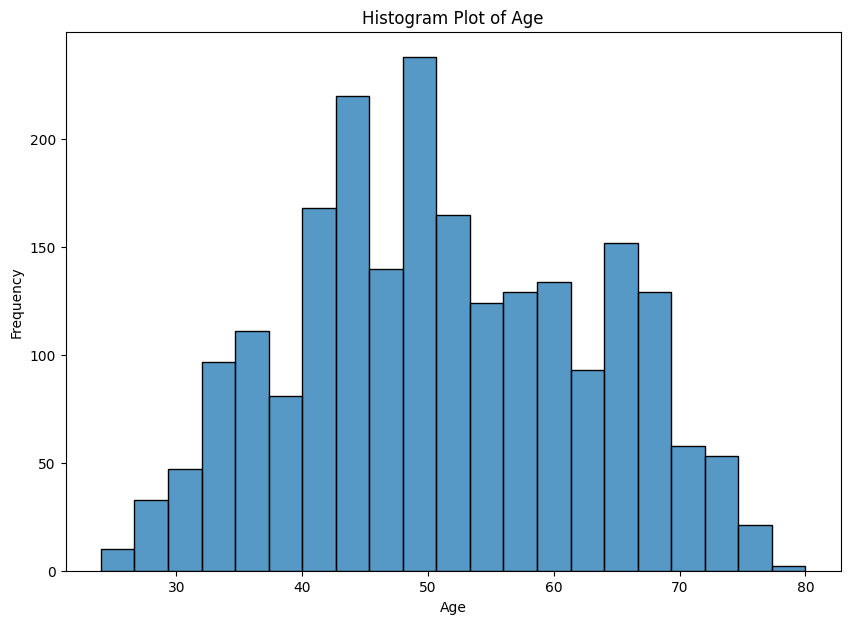

In [33]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Age'])
plt.title("Histogram Plot of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Correlation Matrix**

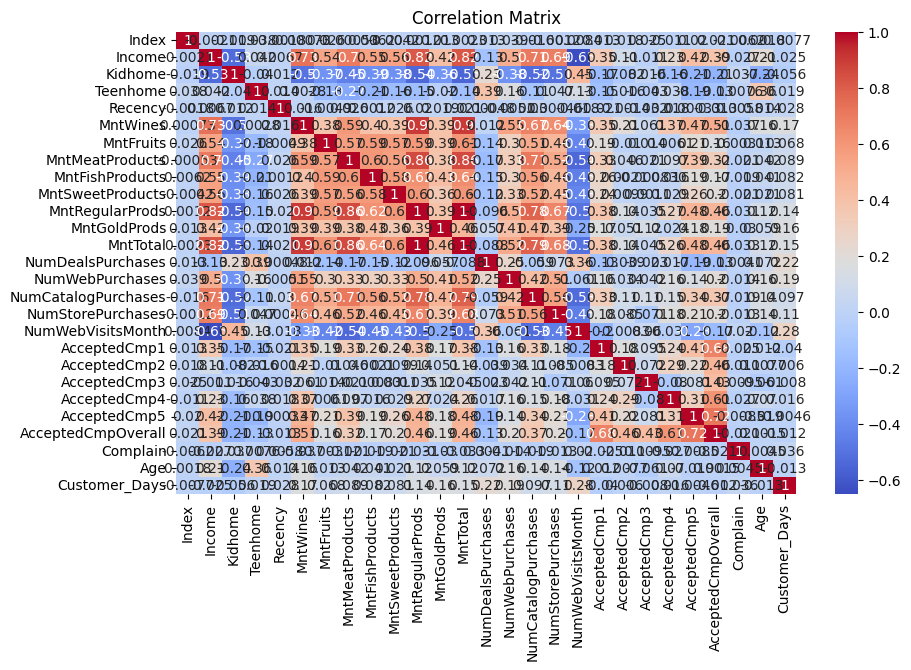

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [35]:
corr, p_value = pointbiserialr(data['AcceptedCmp1'], data['Income'])
print("Point-Biserial Correlation:", corr)
print("P-value:", p_value)

Point-Biserial Correlation: 0.34524206169781596
P-value: 9.494446593166983e-63


**K-Means Clustering**

**Standardising data**

In [36]:
from sklearn.preprocessing import StandardScaler

# Create the 'In_relationship' column based on 'marital_status'
data['In_relationship'] = data['marital_status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)

scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
print(data_scaled[cols_for_clustering].describe())

             Income      MntTotal  In_relationship
count  2.205000e+03  2.205000e+03     2.205000e+03
mean   2.255691e-17 -3.705778e-17     6.444832e-17
std    1.000227e+00  1.000227e+00     1.000227e+00
min   -2.409272e+00 -9.704038e-01    -1.347625e+00
25%   -7.932106e-01 -8.800957e-01    -1.347625e+00
50%   -1.618161e-02 -3.816642e-01     7.420464e-01
75%    8.044529e-01  6.968235e-01     7.420464e-01
max    2.999363e+00  3.348757e+00     7.420464e-01


**PCA PLOTTING**

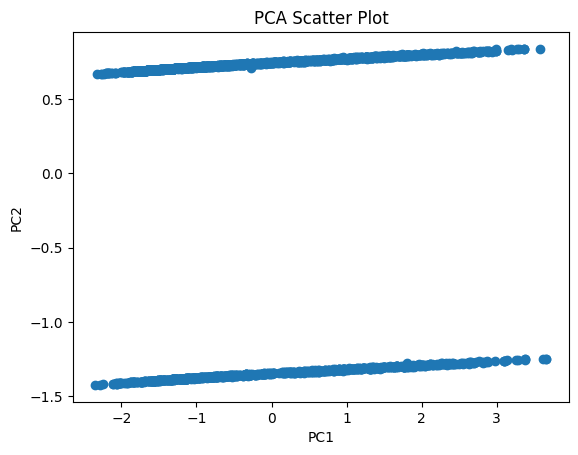

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])

plt.scatter(pca_res[:, 0], pca_res[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot")
plt.show()

**Elbow method**

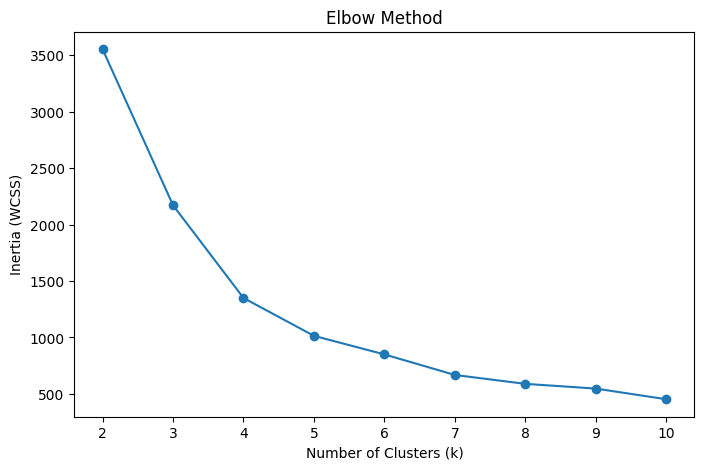

In [38]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled[cols_for_clustering])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.show()

**Silhouette score analysis**

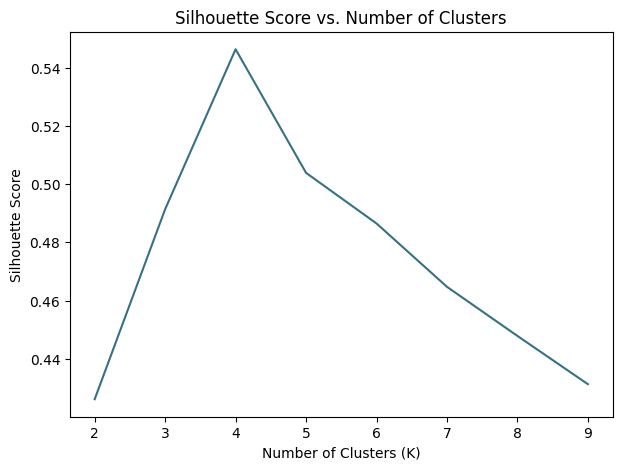

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7, n_init=10)
    clusters = model.fit_predict(data_scaled[cols_for_clustering])
    s_avg = silhouette_score(data_scaled[cols_for_clustering], clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

**VISULISATION**

**Customer_Days vs AcceptedCmpOverall by Cluster**

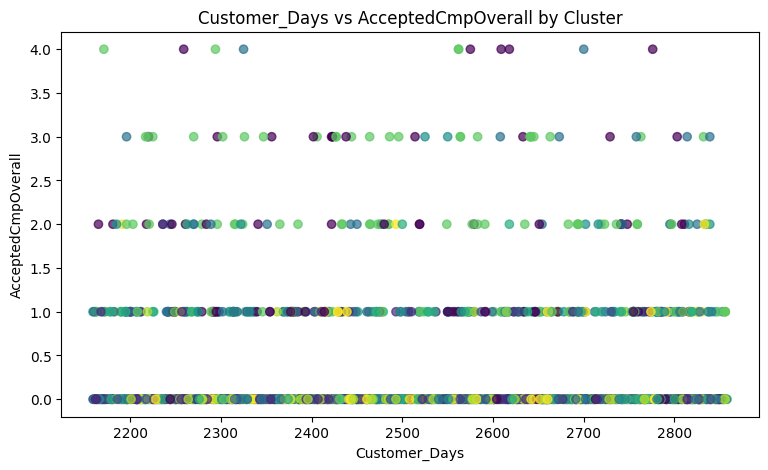

In [40]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

num_clusters = len(np.unique(clusters))
cmap = plt.colormaps.get_cmap('viridis')
normalized_clusters = clusters / (num_clusters - 1)
colors = cmap(normalized_clusters)

plt.figure(figsize=(9,5))
plt.scatter(data['Customer_Days'], data['AcceptedCmpOverall'], color=colors, alpha=0.7)
plt.xlabel("Customer_Days")
plt.ylabel("AcceptedCmpOverall")
plt.title("Customer_Days vs AcceptedCmpOverall by Cluster")
plt.show()

**BOX PLOTTING INCOME BY CLUSTER**

/tmp/ipython-input-2963145097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')


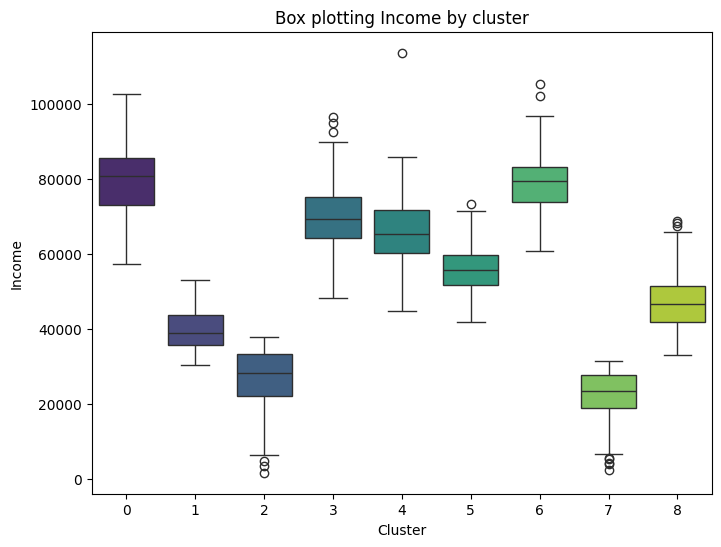

In [41]:
data['Cluster'] = clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Box plotting Income by cluster')
plt.show()

**Cluster Size**

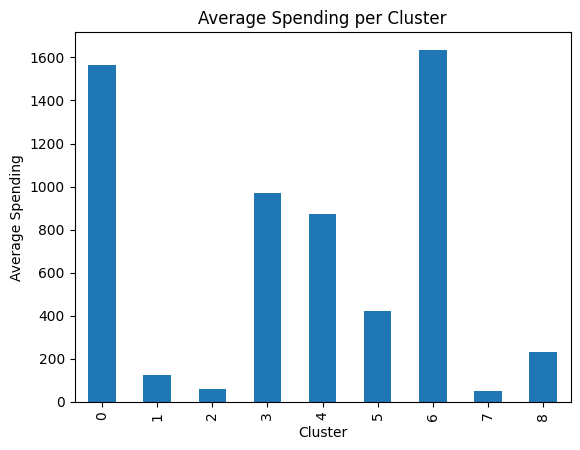

In [42]:
cluster_avg = data.groupby('Cluster')['MntTotal'].mean()

cluster_avg.plot(kind='bar')
plt.title("Average Spending per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending")
plt.show()

**MEAN CONSUMPTION OF DIFFERENT PRODUCT BY CLUSTER**

In [43]:
cols_mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntRegularProds', 'MntGoldProds']
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,MntGoldProds
0,0,795.036232,66.427536,535.507246,96.992754,70.637681,1493.137681,71.463768
1,1,68.744624,5.973118,33.897849,10.553763,5.935484,104.002688,21.102151
2,2,21.614350,5.215247,19.246637,7.623318,5.452915,43.197309,15.955157
3,3,529.636964,48.498350,269.062706,72.042904,51.894389,901.673267,69.462046
4,4,485.598985,46.456853,233.015228,62.812183,44.512690,796.253807,76.142132


/tmp/ipython-input-4054817594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')


Text(0, 0.5, 'In_relationship')

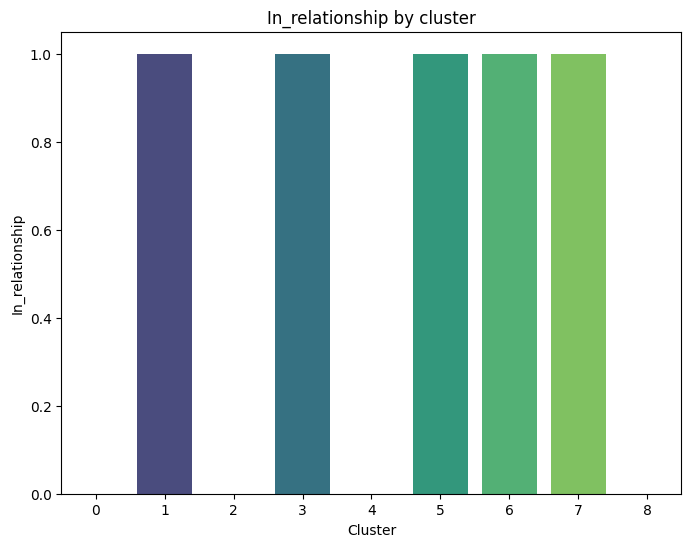

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

In [45]:
cluster_profile = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)

               Index        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        2136.137681  79820.239130  0.057971  0.188406  51.673913  795.036232   
1        2120.010753  39884.741935  0.755376  0.599462  49.352151   68.744624   
2        2097.130045  26566.515695  0.798206  0.278027  50.062780   21.614350   
3        2114.462046  69820.844884  0.095710  0.570957  47.392739  529.636964   
4        2063.081218  66305.121827  0.065990  0.578680  49.421320  485.598985   
5        2116.297491  56210.290323  0.369176  0.892473  49.469534  277.917563   
6        2092.947917  79046.442708  0.057292  0.187500  50.838542  861.916667   
7        2073.112319  22764.949275  0.797101  0.210145  48.623188   13.206522   
8        2108.635556  47509.022222  0.586667  0.782222  45.920000  142.977778   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                      

In [46]:
data['Cluster'].value_counts()

,count
Cluster,
1,372
3,303
5,279
7,276
8,225
2,223
4,197
6,192
0,138


**CLUSTER WISE VISULIZATION**

**INCOME DISTRIBUATION**

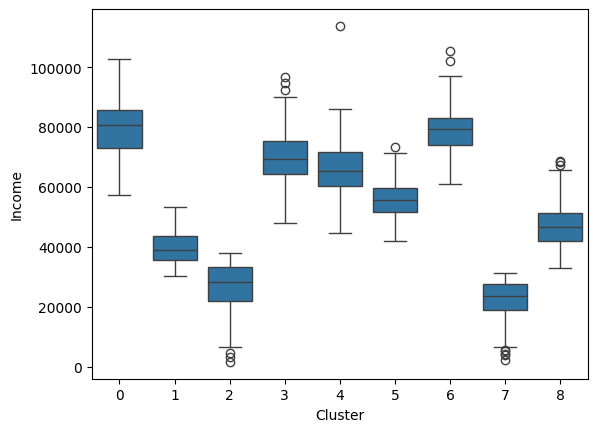

In [47]:
sns.boxplot(x=data['Cluster'], y=data['Income'], data=data)
plt.show()

**SPENDING DISTRIBUTION**

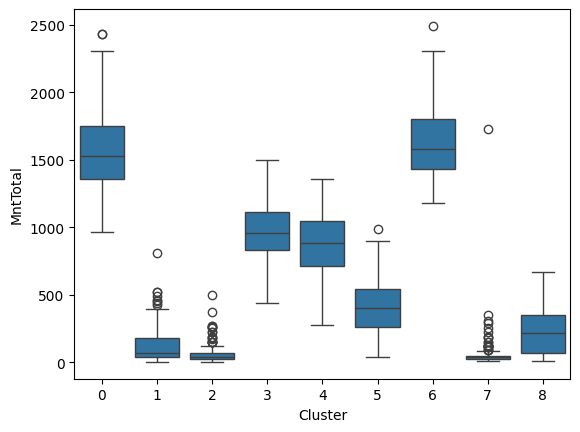

In [48]:
sns.boxplot(x=data['Cluster'] , y=data['MntTotal'] , data=data)
plt.show()

**RECENCY DISTRIBUTION**

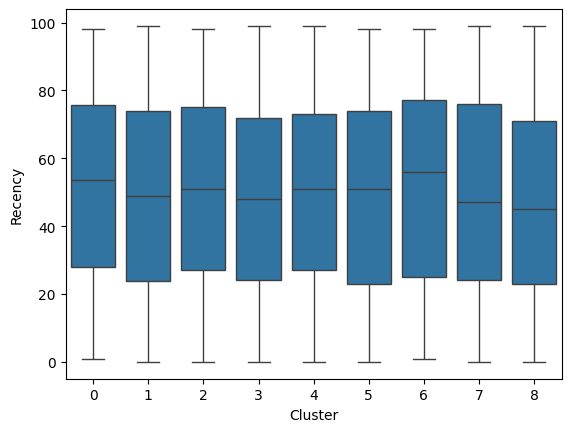

In [49]:
sns.boxplot(x=data['Cluster'] , y=data['Recency'] , data=data)
plt.show()

**Characteristics**

Cluster 0 → High Income, High Spending, Loyal Buyers
Characteristics

Income very high (~79,820)

Wines, meat, fish, sweets sab par high spending

Kids/teens almost none

Age ~51

Many marketing campaigns accepted

Less complaints

Not in relationship

 This is a Premium High-Value Customer Segment

Cluster 1 → Low Income, Medium Age, Family-Oriented, Low Spending
Characteristics

Income low (~39,884)

Kidhome & Teenhome highest

Very low spending

Campaign acceptance almost zero

In relationship

Age ~50

 These are budget-conscious customers with kids

Cluster 3 → High Income, High Spending, Older Customers
Characteristics

Income high (~69,820)

High spending (wines & meat especially)

Teenhome high

Age ~53

Medium campaign acceptance

In relationship

 Wealthy, brand-trusting, relationship-oriented customers

 Cluster 4 → Mid-High Income, Good Spending, Older Customers
Characteristics

Income good (~66,305)

Spending moderate-high

Teenhome moderate

Age ~53

Campaign acceptance medium

 Stable earners, average spenders

Cluster 5 → Medium Income, Medium Spending, Many Teens
Characteristics

Income ~56,210

Teenhome high

Spending moderate

Age ~54

Campaign acceptance medium-low

In relationship

 Middle-class family customers

Cluster 6 → Highest Campaign Acceptance + Very High Spending
Characteristics

Income very high (~79,046)

Spending extremely high (Wines ~862!!)

Kids & teens almost none

Highest AcceptedCmpOverall = 1.10

Age ~51

In relationship

 Your MOST profitable and MOST responsive customer group

Cluster 7 → Lowest Income, Lowest Spending, Younger
Characteristics

Income lowest (~22,764)

Kids home high

Very low purchases

Youngest (~45 years)

Almost zero campaign acceptance

 Low-income young families who rarely purchase

Cluster 8 → Medium Income, Medium Spending, Family-Oriented
Characteristics

Income ~47,509

Teenhome high

Spending medium

In relationship

Age ~53

 Mid-value family customers

**IN SHORT : SEGMENT SUMMARY**
| Cluster | Income   | Spending | Campaign Acceptance | Family Status | Summary               |
| ------- | -------- | -------- | ------------------- | ------------- | --------------------- |
| **0**   | High     | High     | High                | Single        | Premium customers     |
| **1**   | Low      | Low      | Very Low            | Family        | Budget-conscious      |
| **2**   | Low      | Very Low | Low                 | Single        | Low engagement        |
| **3**   | High     | High     | Medium              | Relationship  | Rich loyal buyers     |
| **4**   | Mid-High | Mid-High | Medium              | Single        | Stable mid-spenders   |
| **5**   | Mid      | Medium   | Low                 | Family        | Middle-class families |
| **6**   | High     | Highest  | Highest             | Relationship  | **Best customers**    |
| **7**   | Lowest   | Lowest   | Very Low            | Family        | Price-sensitive young |
| **8**   | Medium   | Medium   | Low                 | Family        | Balanced spenders     |


**Segment-Wise Actionable Insights + Recommendations**

**Cluster 0 — Premium High Spenders (Single, High Income)
Insights**

Wines, meats, sweets par heavy spending

High income + low kids count

Campaigns ko accha response dete hain

Brand-loyal segment

Recommendations

Launch exclusive premium product bundles

Offer VIP membership or early access

Personalized email campaigns (high acceptance rate)

**Cluster 1 — Low Income, Family-Oriented, Low Spending
Insights**

Kidhome & Teenhome high → family expenses more

Low income → price sensitivity

Campaign acceptance very low

Recommendations

Introduce value packs, family combos

Provide discount coupons and festival offers

Promote essential goods instead of premium items

**Cluster 2 — Low Income, Young, Very Low Spending
Insights**

Almost no campaign engagement

Very low purchases

Younger audience

Recommendations

Provide starter offers

Focus on engagement campaigns (fun contests, gamified points)

Push affordable daily-use products

**Cluster 3 — High Income, Mature, High Spending
Insights**

High spending across categories

In relationship → likely dual income

Old age buyers but consistent purchases

Recommendations

Promote health/organic premium products

Loyalty program with anniversary and couple offers

Offer targeted cross-selling (premium wines → cheese/meat combos

**Cluster 4 — Mid-High Income, Moderate Spending
Insights**

Decent income but controlled spending

Mild response to marketing

Stable buyers

Recommendations

Send product comparison ads (premium vs affordable)

Offer “save more on repeat orders” discounts

Mid-price product promotion effective

**Cluster 5 — Middle-Class Family Customers
Insights**

Teenhome high

Medium spending despite moderate income

Limited campaign acceptance

Recommendations

Offer family-oriented bundles (snacks, health items, sweets)

Reward programs for repeat buyers

Festival family deals

**Cluster 6 — BEST Segment (High Income + Highest Spending + Highest Campaign Acceptance)
Insights**

Sabse zyada spending

Sabse zyada campaign acceptance

High income + mature age

Company ka most profitable segment

Recommendations

Create exclusive loyalty tier only for them

Personalized gifts, premium services, early access

High-end cross sell (premium wine → premium accessories)

This segment deserves maximum marketing focus

**Cluster 7 — Lowest Income, Lowest Spending, Young Families
Insights**

Sabse kam income

High Kid/Teen home → budget pressure

No campaign response

Recommendations

Focus on basic & essential items

Attractive low-price combo packs

Try SMS-based offers (low engagement online

**Cluster 8 — Medium Income, Medium Spending, Family-Oriented
Insights**

Balanced spending pattern

Moderate income

Relationship customers → family-focused

Recommendations

Promote family value packs

Cross-sell simple items (snacks → beverages combo)

Mid-price product advertisements will work best

**Final Project Conclusion (Report)**

A total of 9 customer segments were identified using clustering. Each segment shows different spending patterns, incomes, family sizes, and marketing responses. Premium segments such as Cluster 0 and Cluster 6 show higher income and purchases, making them ideal for targeted loyalty and premium product strategies.
Family-oriented segments (Clusters 1, 5, 7, 8) respond better to affordable combo packs and value-oriented campaigns.
Low-income and low-engagement segments (Clusters 1, 2, 7) require cost-focused strategies, while high-value segments (Clusters 0, 3, 6) benefit from personalized marketing and premium offerings.
These insights help the business optimize marketing budgets, design targeted product bundles, and improve customer retention through cluster-specific strategies.

**THANK YOU!**